In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans
from sklearn import preprocessing

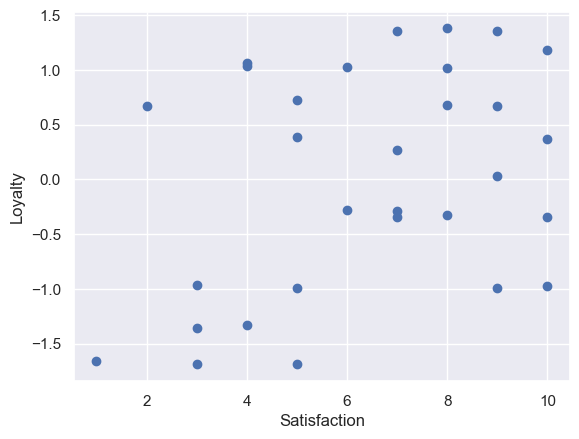

In [12]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.ylabel('Loyalty')
plt.xlabel('Satisfaction')
plt.show()

In [16]:
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)
clusters = x.copy()
clusters['Clusters'] = kmeans.fit_predict(x)

C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


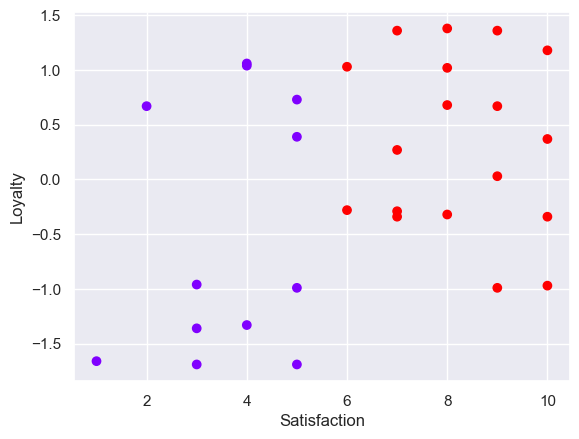

In [18]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c = clusters['Clusters'], cmap = 'rainbow')
plt.ylabel('Loyalty')
plt.xlabel('Satisfaction')
plt.show()

In [22]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [28]:
kmeans = KMeans(2)
kmeans.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Clusters'] = kmeans.fit_predict(x_scaled)

C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


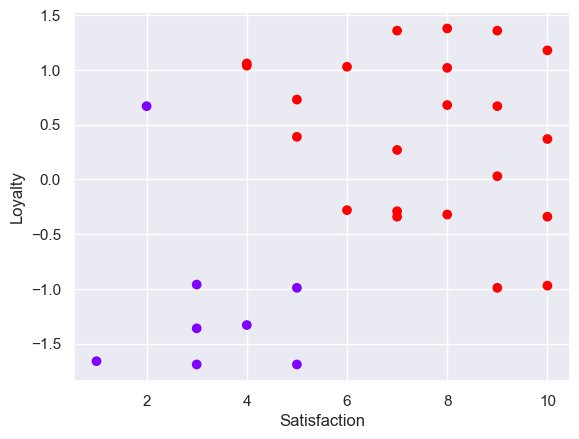

In [30]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['Clusters'], cmap = 'rainbow')
plt.ylabel('Loyalty')
plt.xlabel('Satisfaction')
plt.show()

In [32]:
# Finding the best k

wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

[59.999999999999986,
 29.818973034723147,
 17.913349527387968,
 11.091495064499096,
 7.792695153937187,
 6.914148060615689,
 5.771802640072099,
 4.841375051694448,
 3.893129105327736]

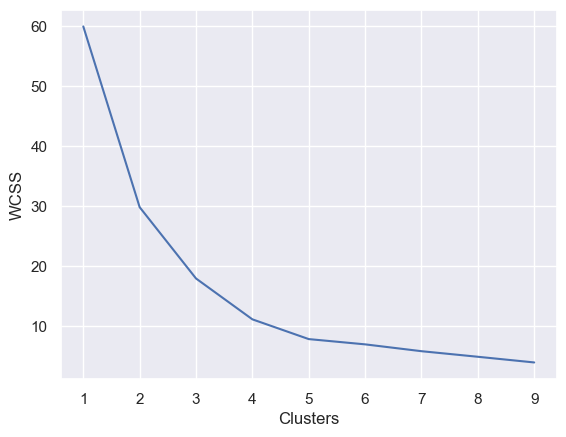

In [36]:
plt.plot(range(1,10), wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# 2, 3, 4, 5 are potential k values
# we can do a manual check and plot for all these values

C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


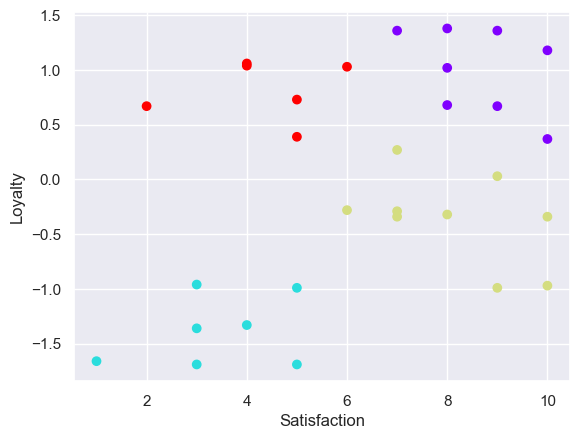

In [48]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Clusters'] = kmeans.fit_predict(x_scaled)

plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['Clusters'], cmap = 'rainbow')
plt.ylabel('Loyalty')
plt.xlabel('Satisfaction')
plt.show()

In [42]:
# It is really important to name the clusters

In [50]:
# 4 seems a good k value

# Cluster 1 - Color blue
# Alienated - Those who are less satisfied and less loyal

# Cluster 2 - Color Red
# Supporters - Those who are not satisfied but still loyal

# Cluster 3 - Color Purple
# Fans - Highly satisfied and highly loyal

# Cluster 4 - Color green
# Roamers - Highly satisfied and highly loyal

# Making more clusters wont improve observations any further 